In [1]:
# 1. Before normalization and after normalization
# 2. Before PCA and after PCA
# 3. Grid Search Comparison
# 4. Transfer Learning
# 5. On datasets - 
# a) Dijkstra
# b) Qsort
# c) Mantevo_miniFE
# d) NPB-EP
# e) NPB- MG
# f) SHA
# g) Stitch
# h) SVM
# 6. For all ML models

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit

Using TensorFlow backend.


In [3]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [4]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_3_Rajat\\Transfer_Learning\\'
df = pd.read_csv(all_datasets+ 'Intel_Qsort_Physical.csv')
dfn = pd.read_csv(all_datasets+ 'Intel_Xeon_Qsort_Physical.csv')

In [5]:
df.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,runtime,bus_speed
0,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,...,0,0,0,0,2,DDR2,667,1,7049.80,2048
1,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,...,0,0,0,0,2,DDR2,667,2,5936.48,2048
2,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,...,0,0,0,0,2,DDR2,667,3,6163.20,2048
3,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,...,0,0,0,0,2,DDR2,667,4,5656.76,2048
4,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,...,0,0,0,0,2,DDR2,667,5,5899.16,2048


In [6]:
dfn.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,runtime,bus_speed
0,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,...,8,64,12,15360,16,DDR4,1866,1,12945.40,32768
1,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,...,8,64,12,15360,16,DDR4,1866,2,10084.36,32768
2,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,...,8,64,12,15360,16,DDR4,1866,3,9943.28,32768
3,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,...,8,64,12,15360,16,DDR4,1866,4,9433.28,32768
4,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,...,8,64,12,15360,16,DDR4,1866,5,8592.68,32768


In [7]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

(Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'runtime', 'bus_speed'],
       dtype='object'),
 21,
 Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'runtime', 'bus_speed'],
       dtype='object'),
 21)

In [41]:
len(df),len(dfn)

(280, 40)

In [42]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [43]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [44]:
encoded_data_frame.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,runtime,bus_speed
0,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,...,0,0,2,1,0,0,667,1,7049.80,2048
1,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,...,0,0,2,1,0,0,667,2,5936.48,2048
2,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,...,0,0,2,1,0,0,667,3,6163.20,2048
3,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,...,0,0,2,1,0,0,667,4,5656.76,2048
4,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,...,0,0,2,1,0,0,667,5,5899.16,2048


In [45]:
encoded_data_frame_n.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem_clock,num-cpus,runtime,bus_speed
0,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,...,8,64,12,15360,16,1,1866,1,12945.40,32768
1,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,...,8,64,12,15360,16,1,1866,2,10084.36,32768
2,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,...,8,64,12,15360,16,1,1866,3,9943.28,32768
3,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,...,8,64,12,15360,16,1,1866,4,9433.28,32768
4,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,...,8,64,12,15360,16,1,1866,5,8592.68,32768


In [46]:
encoded_data_frame.columns, len(encoded_data_frame.columns)

(Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'runtime',
        'bus_speed'],
       dtype='object'), 23)

In [47]:
encoded_data_frame_n.columns, len(encoded_data_frame_n.columns)

(Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem_clock', 'num-cpus', 'runtime', 'bus_speed'],
       dtype='object'), 21)

In [48]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1' ])

In [49]:
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1' ,'mem-type_2' ,'mem-type_3' ])

In [50]:
total_data.columns, total_data_n.columns

(Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'runtime', 'bus_speed'],
       dtype='object'),
 Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'runtime', 'bus_speed'],
       dtype='object'))

In [51]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [52]:
X_Intel = total_data.drop(columns = ['runtime']).to_numpy()
Y_Intel = total_data['runtime'].to_numpy()

In [53]:
X_ARM = total_data_n.drop(columns = ['runtime']).to_numpy()
Y_ARM = total_data_n['runtime'].to_numpy()

# Train -> Intel Data 
# Test -> Xeon data

In [55]:
X_Intel.shape, X_ARM.shape, Y_Intel.shape, Y_ARM.shape

((280, 18), (40, 18), (280,), (40,))

In [56]:
Y_Intel[:10], Y_ARM[:10] 

(array([7049.8 , 5936.48, 6163.2 , 5656.76, 5899.16, 5675.4 , 5378.96,
        5242.44, 7049.8 , 5936.48]),
 array([12945.4 , 10084.36,  9943.28,  9433.28,  8592.68,  7829.96,
         7747.32,  7541.84, 15577.2 , 12911.44]))

 # Appending 10% data of Xeon in Intel Data (X_train and Y_train)

In [57]:
# Separating ARM data to 1% and 99%
X_train_ARM, X_test_ARM, Y_train_ARM, Y_test_ARM = train_test_split(X_ARM, Y_ARM, test_size = 0.90, random_state=42)
print(X_train_ARM.shape, X_test_ARM.shape, Y_train_ARM.shape, Y_test_ARM.shape)
X_train_Intel = np.append(X_Intel, X_train_ARM,axis = 0)
Y_train_Intel = np.append(Y_Intel, Y_train_ARM,axis = 0)
print(X_train_Intel.shape, Y_train_Intel.shape, X_test_ARM.shape, Y_test_ARM.shape)

(4, 18) (36, 18) (4,) (36,)
(284, 18) (284,) (36, 18) (36,)


In [58]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_train_Intel = scaler_x.fit_transform(X_train_Intel)
X_test_ARM = scaler_x.fit_transform(X_test_ARM)
Y_train_Intel = np.reshape(Y_train_Intel, (len(Y_train_Intel),1))
Y_test_ARM = np.reshape(Y_test_ARM, (len(Y_test_ARM),1))
Y_train_Intel = scaler_y.fit_transform(Y_train_Intel)
Y_test_ARM = scaler_y.fit_transform(Y_test_ARM)

In [59]:
X_train = X_train_Intel
X_test = X_test_ARM
Y_train = Y_train_Intel
Y_test = Y_test_ARM
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((284, 18), (36, 18), (284, 1), (36, 1))

In [60]:
Y_train = np.reshape(Y_train, (Y_train.shape[0], ))
print(Y_train.shape)

(284,)


In [61]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-8.270, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.315, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.879, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-8.188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.883, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-6.730, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.149, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.957, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  1.0301973359700767
R2 score = -0.030197335970076677
Mean Absolute Percentage Error is: [0.35714866]
Mean Absolute Error is: 0.7788617218795092


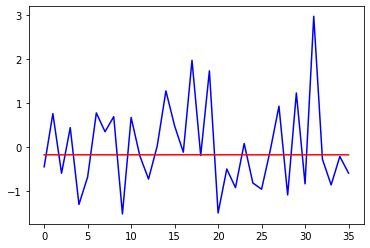

In [62]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# Transfer Learning

MSE: 
 15802081.224766714

R2: 
 -0.030197335970076455

MAPE: 
 0.22416747252536431


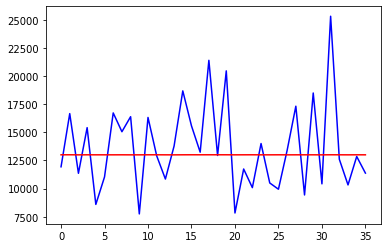

In [63]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

best_svr.fit(X_train, Y_train)
Y_pred = best_svr.predict(X_test)
Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores[0])


# 2. Linear Regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=-14.486, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] fit_intercept=True, normalize=True ..............................
[CV] . fit_intercept=True, normalize=True, score=-0.279, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=-1292605311544839450612727808.000, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................
[CV]  fit_intercept=True, normalize=False, score=-15.141, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................
[CV]  fit_intercept=True, normalize=False, score=-0.224, total=   0.0s
[CV] fit_intercept=True, normalize=False .............................
[CV]  fit_intercept=True, normalize=False, score=-171240944591950721478295552.000, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................
[CV]  fit_intercept=False, normalize=True, score=-14.969, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................
[CV]  fit_intercept=False, normalize=True, score=-0.257, total=   0.0s
[CV] fit_intercept=False, normalize=True .............................
[CV]  fit_intercept=Fal

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'fit_intercept': False, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
MSE =  9.096076197352129e+22
R2 score = -9.096076197352129e+22

Mean Absolute Percentage Error = [7.54988195e+10]
Mean Absolute Error is: 301597019172.14185


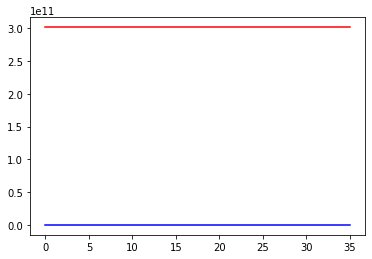

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# defining parameter range 
param_grid = {'fit_intercept': [True, False],  
             'normalize' : [True, False], 
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# Transfer Learning

MSE: 
 2.5359382763357823e+33

R2: 
 -1.6532739069655295e+26

MAPE: 
 [3.97031105e+12]


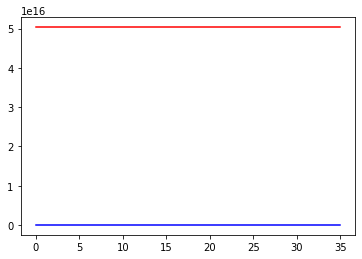

In [65]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.svm import SVR
best_lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
best_lr.fit(X_train, Y_train)
Y_pred = best_lr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)


In [128]:
X_train.shape, Y_train.shape

((292, 18), (292,))

In [129]:
Y_train[:10], Y_test[:10] 

(array([7049.8 , 5936.48, 6163.2 , 5656.76, 5899.16, 5675.4 , 5378.96,
        5242.44, 7049.8 , 5936.48]),
 array([11938.4 , 16667.32, 11359.56, 15420.08,  8592.68, 11035.56,
        16728.2 , 15058.4 , 16393.44,  7747.32]))

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=-14.358, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=-0.111, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=auto ......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=auto, score=-0.764, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=-14.358, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=-0.111, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=svd .......
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=svd, score=-0.764, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky ..
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky, score=-14.358, total=   0.0s
[CV] alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky ..
[CV]  alpha=0.1, fit_intercept=True, normalize=True, solver=cholesky, score=-0.111, total=   0.0s
[CV

[CV] alpha=1, fit_intercept=True, normalize=True, solver=sag .........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sag, score=0.011, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=sag .........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=sag, score=-0.810, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=-12.703, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=0.012, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=True, solver=saga ........
[CV]  alpha=1, fit_intercept=True, normalize=True, solver=saga, score=-0.810, total=   0.0s
[CV] alpha=1, fit_intercept=True, normalize=False, solver=auto .......
[CV]  alpha=1, fit_intercept=True, normalize=False, solver=auto, score=-14.955, total=   0.0s
[CV] alpha=1, fit_inter

[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=-14.616, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=lsqr ......
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=-0.145, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=lsqr ......
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=lsqr, score=-0.764, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=-14.618, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=-0.144, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg .
[CV]  alpha=10, fit_intercept=True, normalize=False, solver=sparse_cg, score=-0.764, total=   0.0s
[CV] alpha=10, fit_intercept=True, normalize=False, solver=sag .

[CV]  alpha=100, fit_intercept=False, normalize=True, solver=auto, score=-0.341, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=-6.153, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=-0.005, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=svd ......
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=svd, score=-0.341, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=-6.153, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .
[CV]  alpha=100, fit_intercept=False, normalize=True, solver=cholesky, score=-0.005, total=   0.0s
[CV] alpha=100, fit_intercept=False, normalize=True, solver=cholesky .

[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=-5.268, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sag .....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=0.007, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=sag .....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=sag, score=-0.359, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=-5.268, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=0.007, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=True, solver=saga ....
[CV]  alpha=1000, fit_intercept=False, normalize=True, solver=saga, score=-0.359, total=   0.0s
[CV] alpha=1000, fit_intercept=False, normalize=False, solver=auto ...
[CV

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.0s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 1000, 'fit_intercept': False, 'normalize': False, 'solver': 'sag'}
Ridge(alpha=1000, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.001)
MSE =  0.9387656130664706
R2 score = 0.06123438693352945

Mean Absolute Percentage Error = [-0.04585043]
Mean Absolute Error is: 0.7845502170293025


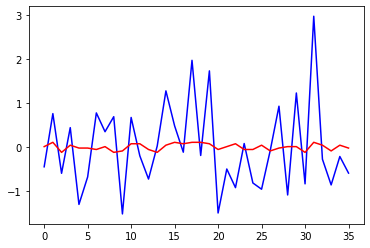

In [66]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=1.0, fit_intercept=True, 
                         normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
# defining parameter range 
param_grid = {'alpha': [0.1, 1, 10, 100, 1000],  
             'fit_intercept' : [True, False],
              'normalize' :[True, False],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best RR

MSE: 
 14399771.345009439

R2: 
 0.06122453952732598

MAPE: 
 [0.23756366]


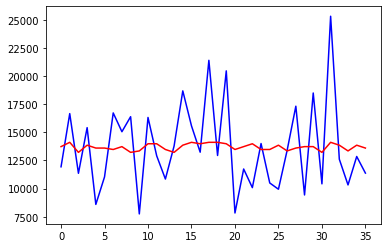

In [67]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn import linear_model
best_rr = linear_model.Ridge(alpha=1000, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='sag', tol=0.001)
best_rr.fit(X_train, Y_train)
Y_pred = best_rr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)


# 4. K-Nearest Neighbors + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV]  n_neighbors=2, p=1, weights=uniform, score=-10.720, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV]  n_neighbors=2, p=1, weights=uniform, score=-0.845, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV]  n_neighbors=2, p=1, weights=uniform, score=-1.171, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=-10.720, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=-0.845, total=   0.0s
[CV] n_neighbors=2, p=1, weights=distance ............................
[CV]  n_neighbors=2, p=1, weights=distance, score=-1.171, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................
[CV]  n_neighbors=2, p=2, weights=uniform, score=-10.720, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................
[CV]  n_neighbors=2, p=2, weights=uniform, score=-0.845, total=   0.0s
[CV] n_neighbors=2, p=2, weights=uniform .............................
[CV]  n_neighbors=2, p=2, weights=uniform, score=-1.163, total=   0.0s
[

[CV] n_neighbors=5, p=2, weights=uniform .............................
[CV]  n_neighbors=5, p=2, weights=uniform, score=-0.944, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV]  n_neighbors=5, p=2, weights=distance, score=-16.576, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV]  n_neighbors=5, p=2, weights=distance, score=-0.737, total=   0.0s
[CV] n_neighbors=5, p=2, weights=distance ............................
[CV]  n_neighbors=5, p=2, weights=distance, score=-0.804, total=   0.0s
[CV] n_neighbors=5, p=4, weights=uniform .............................
[CV]  n_neighbors=5, p=4, weights=uniform, score=-12.522, total=   0.0s
[CV] n_neighbors=5, p=4, weights=uniform .............................
[CV]  n_neighbors=5, p=4, weights=uniform, score=-0.502, total=   0.0s
[CV] n_neighbors=5, p=4, weights=uniform .............................
[CV]  n_neighbors=5, p=4, weights=uniform, score=-0.941, total=   0.0s
[

[CV] n_neighbors=9, p=4, weights=uniform .............................
[CV]  n_neighbors=9, p=4, weights=uniform, score=-0.907, total=   0.0s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV]  n_neighbors=9, p=4, weights=distance, score=-16.576, total=   0.0s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV]  n_neighbors=9, p=4, weights=distance, score=-0.737, total=   0.0s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV]  n_neighbors=9, p=4, weights=distance, score=-0.802, total=   0.0s
[CV] n_neighbors=9, p=5, weights=uniform .............................
[CV]  n_neighbors=9, p=5, weights=uniform, score=-13.662, total=   0.0s
[CV] n_neighbors=9, p=5, weights=uniform .............................
[CV]  n_neighbors=9, p=5, weights=uniform, score=-0.357, total=   0.0s
[CV] n_neighbors=9, p=5, weights=uniform .............................
[CV]  n_neighbors=9, p=5, weights=uniform, score=-0.894, total=   0.0s
[

[CV]  n_neighbors=15, p=5, weights=uniform, score=-0.119, total=   0.0s
[CV] n_neighbors=15, p=5, weights=uniform ............................
[CV]  n_neighbors=15, p=5, weights=uniform, score=-0.836, total=   0.0s
[CV] n_neighbors=15, p=5, weights=distance ...........................
[CV]  n_neighbors=15, p=5, weights=distance, score=-16.576, total=   0.0s
[CV] n_neighbors=15, p=5, weights=distance ...........................
[CV]  n_neighbors=15, p=5, weights=distance, score=-0.737, total=   0.0s
[CV] n_neighbors=15, p=5, weights=distance ...........................
[CV]  n_neighbors=15, p=5, weights=distance, score=-0.796, total=   0.0s
[CV] n_neighbors=15, p=7, weights=uniform ............................
[CV]  n_neighbors=15, p=7, weights=uniform, score=-12.330, total=   0.0s
[CV] n_neighbors=15, p=7, weights=uniform ............................
[CV]  n_neighbors=15, p=7, weights=uniform, score=-0.126, total=   0.0s
[CV] n_neighbors=15, p=7, weights=uniform .......................

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    6.2s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')
MSE =  1.3421889062760775
R2 score = -0.34218890627607745

Mean Absolute Percentage Error = [0.68864295]
Mean Absolute Error is: 0.8511149007083172


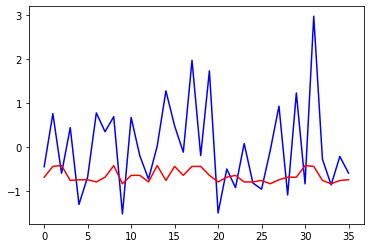

In [68]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform', 
                            algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
# defining parameter range 
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 9, 10, 13, 15],  
             'weights' : ['uniform', 'distance'],
              'p' : [1, 2, 4, 5, 7 ,10]
             } 
grid = GridSearchCV(neigh, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best KNN Regressor

MSE: 
 20587684.878823474

R2: 
 -0.342188906276077

MAPE: 
 [0.21436934]


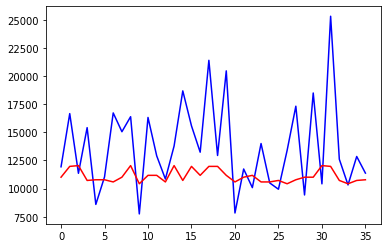

In [70]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.neighbors import KNeighborsRegressor
best_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')
best_knn.fit(X_train, Y_train)
Y_pred = best_knn.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ..... alpha=1e-10, normalize_y=True, score=-16.576, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-0.737, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-0.790, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] .... alpha=1e-10, normalize_y=False, score=-16.576, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-0.737, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-0.777, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ..... alpha=1e-09, normalize_y=True, score=-16.576, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-0.737, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-0.790, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.01, 'normalize_y': False}
GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  0.8721927961965008
R2 score = 0.1278072038034992

Mean Absolute Percentage Error = [-0.04646326]
Mean Absolute Error is: 0.7556926766133455


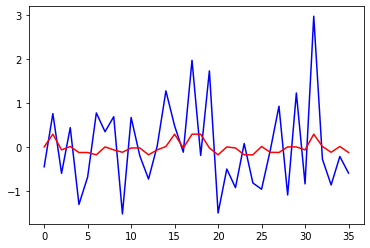

In [71]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

MSE: 
 13378467.336236482

R2: 
 0.12780720380349908

MAPE: 
 [0.22763376]


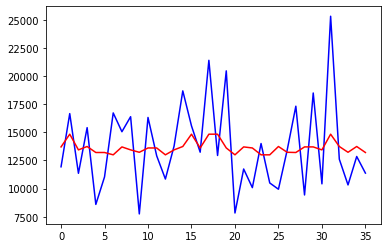

In [72]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.gaussian_process import GaussianProcessRegressor
best_gpr =GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
best_gpr.fit(X_train, Y_train)
Y_pred = best_gpr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)

# 6. Decision Tree + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-16.124, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.374, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.788, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=-15.676, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.128, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.816, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=2, splitter=best, 

[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-12.602, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.128, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.783, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best, score=-12.547, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_leaf=1, splitter=best,

[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.265, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.744, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=-16.639, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, score=-0.460, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=auto, min_samples_leaf=7, splitter=best, scor

[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.777, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=-15.170, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.473, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.800, total=   0.0s
[CV] criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=3, max_features=log2, min_samples_leaf=6, splitter=random, scor

[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-14.222, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.415, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.734, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-14.129, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=random, sco

[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.700, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.811, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=-16.543, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.474, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=auto, min_samples_leaf=4, splitter=random, 

[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.748, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=-14.975, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.456, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=3, splitter=random, score=-0.797, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=log2, min_samples_leaf=4, splitter=best, 

[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-13.771, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.544, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.817, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-16.172, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=7, max_features=sqrt, min_samples_leaf=3, splitter=best,

[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.730, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.802, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=-16.576, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, score=-0.737, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=auto, min_samples_leaf=2, splitter=best, scor

[CV] criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=sqrt, min_samples_leaf=7, splitter=random, score=-0.800, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=-16.576, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.384, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best, score=-0.803, total=   0.0s
[CV] criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random 
[CV]  criterion=mse, max_depth=9, max_features=log2, min_samples_leaf=1, splitter=random, scor

[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=6, splitter=random, score=-0.778, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=-16.736, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=-0.651, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=best, score=-0.835, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=-15.727, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, mi

[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.873, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=-15.054, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.520, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.734, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=6, splitter=random, score=-15.563, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, mi

[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.797, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-15.351, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.399, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.792, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-11.884, total=   0.0s
[CV] criterion=mse, max_depth=15, max_features=sqrt, mi

[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.803, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=-16.576, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.734, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.816, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=4, splitter=random, score=-16.663, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=auto, mi

[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.800, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=-16.576, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.737, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.797, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=3, splitter=random, score=-15.707, total=   0.0s
[CV] criterion=mse, max_depth=20, max_features=log2, mi

[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=1, splitter=random, score=-0.806, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-16.576, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.737, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.806, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=30, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-16.576, total=   0.0s
[CV] criterion=mse, max_depth=30, max_features=sqrt, mi

[CV]  criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.824, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-16.124, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.374, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.788, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_leaf=1, splitter=random, score=-13.450, total

[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-14.660, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.357, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.854, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-14.209, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_leaf=6, splitter=random, score=0.0

[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.527, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.801, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=-15.170, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.410, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=auto, min_samples_leaf=4, splitter=random, score=

[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=best, score=-0.800, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=-14.079, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.507, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.852, total=   0.0s
[CV] criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=friedman_mse, max_depth=3, max_features=log2, min_samples_leaf=3, splitter=best, score=

[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=-15.571, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.312, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.720, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-15.184, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-

[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.321, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=5, splitter=random, score=-0.880, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=-15.423, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.539, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best, score=-0.748

[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=-16.579, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.735, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.803, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=-16.562, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criter

[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.617, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.853, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-14.178, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random, score=-0.390, total=   0.0s
[CV] criterion=friedman_mse, max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  cri

[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.817, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=-16.452, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.642, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=4, splitter=random, score=-0.867, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  c

[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=-16.576, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.736, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=2, splitter=random, score=-0.804, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best, score=-16.577, total=   0.0s
[CV] criterion=friedman_mse, max_depth=9, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  

[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=-15.735, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.422, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_leaf=7, splitter=random, score=-0.796, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best, score=-16.576, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=best

[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.568, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.769, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=-15.872, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.621, total=   0.0s
[CV] criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random 


[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.737, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.797, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-16.576, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.737, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, splitter=random 


[CV] criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.454, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.862, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=-11.813, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 
[CV]  criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random, score=-0.452, total=   0.0s
[CV] criterion=friedman_mse, max_depth=20, max_features=log2, min_samples_leaf=7, splitter=random 


[CV] criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.628, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.813, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-14.112, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.473, total=   0.0s
[CV] criterion=friedman_mse, max_depth=30, max_features=sqrt, min_samples_leaf=5, splitter=random 


[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=best, score=-0.854, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=-8.802, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.367, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.821, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_leaf=4, splitter=best, score=-14.076, total=   0.0s
[CV] criterion=mae, max_depth=2, max_features=auto, min_sam

[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.231, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=4, splitter=random, score=-0.953, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-11.449, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, score=-0.772, total=   0.0s
[CV] criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=3, max_features=sqrt, min_samples_leaf=5, splitter=best, scor

[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=3, splitter=random, score=-0.878, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=-14.199, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=-1.062, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=best, score=-0.902, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_leaf=4, splitter=random, scor

[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=-13.549, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.649, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=best, score=-0.844, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, score=-7.166, total=   0.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=3, splitter=random, scor

[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-1.155, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=best, score=-0.887, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-8.134, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, score=-0.644, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=5, max_features=sqrt, min_samples_leaf=2, splitter=random, s

[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=best, score=-0.881, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=-13.892, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=-1.135, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=1, splitter=random, score=-0.878, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=auto, min_samples_leaf=2, splitter=best, 

[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.211, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=6, splitter=random, score=-0.947, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=-13.112, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, score=-0.735, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=log2, min_samples_leaf=7, splitter=best, scor

[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=5, splitter=random, score=-0.933, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-10.096, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.212, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=best, score=-0.863, total=   0.0s
[CV] criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random 
[CV]  criterion=mae, max_depth=9, max_features=sqrt, min_samples_leaf=6, splitter=random, scor

[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=-15.014, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=-1.199, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=best, score=-0.921, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random, score=-15.023, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, splitter=r

[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=-13.428, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.849, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.906, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=-10.280, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.766, total=   0.0s
[CV] criterion=mae, max_depth=10, max_features=log2, 

[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-13.611, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-1.189, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.857, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-13.611, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-1.201, total=   0.0s
[CV] criterion=mae, max_depth=15, max_features=sqrt, 

[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=-1.199, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=best, score=-0.921, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=-15.081, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=-0.695, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, splitter=random, score=-0.884, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=aut

[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.841, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=best, score=-0.920, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=-11.798, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.863, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random 
[CV]  criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=4, splitter=random, score=-0.928, total=   0.0s
[CV] criterion=mae, max_depth=20, max_features=log

[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-1.181, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=best, score=-0.857, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-13.611, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-1.201, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=3, splitter=random, score=-0.863, total=   0.0s
[CV] criterion=mae, max_depth=30, max_features=sqr

[Parallel(n_jobs=1)]: Done 3780 out of 3780 | elapsed:   37.1s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'splitter': 'random'}
DecisionTreeRegressor(criterion='mae', max_depth=2, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')
MSE =  1.010784879283826
R2 score = -0.010784879283826099

Mean Absolute Percentage Error = [0.18306646]
Mean Absolute Error is: 0.7835791562156206


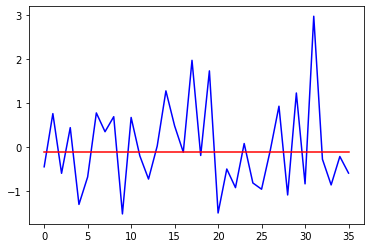

In [73]:
from sklearn.tree import DecisionTreeRegressor #  ' min_samples_split' : [2],
regressor = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, 
                                  min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None)
# defining parameter range 
param_grid = {'criterion': ['mse','friedman_mse', 'mae'],  
              'splitter' : ['best', 'random'], 
              'max_depth': [2,3,4,5,7,9,10,15,20,30 ],
              'min_samples_leaf' : [1, 2,3,  4, 5,6, 7],
              'max_features' : ['auto', 'sqrt', 'log2'],
             } 
grid = GridSearchCV(regressor, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Decision Tree Regressor 

MSE: 
 15504315.73206183

R2: 
 -0.01078487928382632

MAPE: 
 [0.23040182]


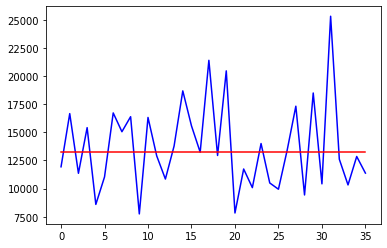

In [74]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.tree import DecisionTreeRegressor
best_dtr = DecisionTreeRegressor(criterion='mae', max_depth=2, max_features='sqrt',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')
best_dtr.fit(X_train, Y_train)
Y_pred = best_dtr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)

# 7. Random Forest + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=-16.128, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=-0.570, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=-0.785, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=-14.052, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=-0.376, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=-0.775, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=-16.088, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=-0.535, total= 

[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=-18.948, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=-0.627, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=-0.764, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=-17.399, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=-0.781, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=-0.816, t

[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=-0.768, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=-0.764, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=-15.398, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=-0.819, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=-0.816, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 
[CV]  criter

[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False, score=-0.785, total=   0.2s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=-16.538, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=-0.777, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=-0.795, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=-16.776, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_st

[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=-14.994, total=   0.3s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=-0.716, total=   0.3s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=-0.854, total=   0.3s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=-13.525, total=   0.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=-0.639, total=   0.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=-0.864, t

[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=-15.899, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=-0.715, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=-0.820, total=   0.4s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=-15.850, total=   0.4s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=-0.691, total=   0.4s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=-0.837, total=   0.4s
[CV] criterion=mae, max_depth=15, n_estimators=200, 

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:  1.7min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
0it [00:00, ?it/s]


{'criterion': 'mae', 'max_depth': 5, 'n_estimators': 10, 'warm_start': 'False'}
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start='False')
MSE =  0.8351962282254594
R2 score = 0.16480377177454064

Mean Absolute Percentage Error = [0.17864278]
Mean Absolute Error is: 0.7141131007869569


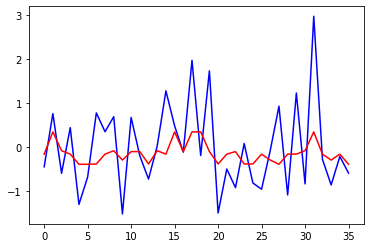

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                            verbose=0, warm_start=False)
# defining parameter range 
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'warm_start': ['True', 'False'],

             } 
'''
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 50, 100, 200], 
              'warm_start': ['True', 'False'],
              
             }'''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
tqdm(grid.fit(X_train, Y_train)) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Random Forest

MSE: 
 11327703.717786817

R2: 
 0.2615042267703197

MAPE: 
 [0.21243521]


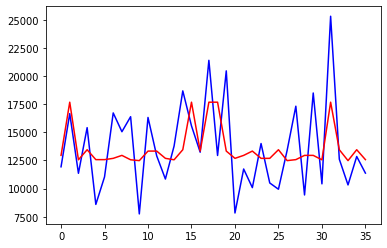

In [76]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.ensemble import RandomForestRegressor
best_rf = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start='False')
best_rf.fit(X_train, Y_train)
Y_pred = best_rf.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)

# 8. Extrememly Randomized Trees + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=-14.759, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=-0.190, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=True, score=-0.734, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=-14.759, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=-0.190, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=10, warm_start=False ...
[CV]  criterion=mse, max_depth=3, n_estimators=10, warm_start=False, score=-0.734, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=-14.964, total=   0.1s
[CV] criterion=mse, max_depth=3, n_estimators=50, warm_start=True ....
[CV]  criterion=mse, max_depth=3, n_estimators=50, warm_start=True, score=-0.237, total= 

[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=-16.576, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=-0.737, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=10, warm_start=False ..
[CV]  criterion=mse, max_depth=10, n_estimators=10, warm_start=False, score=-0.803, total=   0.0s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=-16.576, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=-0.731, total=   0.1s
[CV] criterion=mse, max_depth=10, n_estimators=50, warm_start=True ...
[CV]  criterion=mse, max_depth=10, n_estimators=50, warm_start=True, score=-0.802, t

[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=-0.401, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=True, score=-0.745, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=-15.678, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=-0.401, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=4, n_estimators=10, warm_start=False, score=-0.745, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, n_estimators=50, warm_start=True 
[CV]  criter

[CV]  criterion=friedman_mse, max_depth=10, n_estimators=100, warm_start=False, score=-0.803, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=-16.576, total=   0.5s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=-0.728, total=   0.3s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=True, score=-0.804, total=   0.4s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False, score=-16.576, total=   0.4s
[CV] criterion=friedman_mse, max_depth=10, n_estimators=200, warm_start=False 
[CV]  criterion=friedman_mse, max_depth=10, n_estimators=200, warm_st

[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=-14.119, total=   0.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=-0.488, total=   0.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=True ...
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=True, score=-0.886, total=   0.3s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=-14.119, total=   0.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=-0.488, total=   0.4s
[CV] criterion=mae, max_depth=4, n_estimators=100, warm_start=False ..
[CV]  criterion=mae, max_depth=4, n_estimators=100, warm_start=False, score=-0.886, t

[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=-13.611, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=-1.201, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=True ..
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=True, score=-0.862, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=-13.611, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=-1.201, total=   0.5s
[CV] criterion=mae, max_depth=15, n_estimators=100, warm_start=False .
[CV]  criterion=mae, max_depth=15, n_estimators=100, warm_start=False, score=-0.862, total=   0.4s
[CV] criterion=mae, max_depth=15, n_estimators=200, 

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:  1.9min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 3, 'n_estimators': 200, 'warm_start': 'True'}
ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=3,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start='True')
MSE =  0.960739228908523
R2 score = 0.039260771091476965

Mean Absolute Percentage Error = [0.40211619]
Mean Absolute Error is: 0.7536440073748758


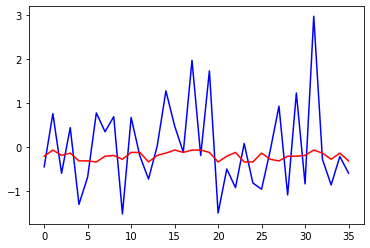

In [77]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                          max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, 
                          random_state=42, verbose=0, warm_start=False)


# defining parameter range 
param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'warm_start': ['True', 'False']
             }
   
'''param_grid = {'n_estimators' : [10, 50, 100, 200],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 50, 100, 200], 
              'warm_start': ['True', 'False'],
              'bootstrap' : ['True', 'False'],
              'oob_score' :['True', 'False']
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Extra Trees Regressor 

MSE: 
 14736671.122078296

R2: 
 0.0392607710914773

MAPE: 
 [0.214084]


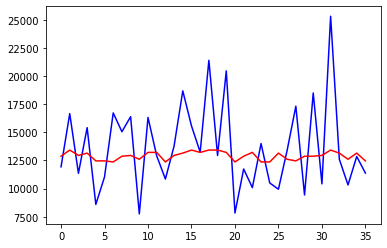

In [78]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn.ensemble import ExtraTreesRegressor
best_etr = ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=3,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start='True')
best_etr.fit(X_train, Y_train)
Y_pred = best_etr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, max_depth=3, n_estimators=10 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=10, score=-13.580, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=10, score=-0.110, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, max_depth=3, n_estimators=10 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=10, score=-0.778, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=20 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=20, score=-15.286, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=20 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=20, score=-0.392, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=20 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=20, score=-0.770, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=50, score=-16.448, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50 .....................
[CV]  criterion=mse, max_depth=3, n_estimators=50, score=-0.602, total=   0.0s
[CV] criterion=mse, max_depth=3, n_estimators=50 .....................
[CV]  criterion=mse, max_de

[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, score=-13.763, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10 ............
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, score=-0.219, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=10 ............
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=10, score=-0.805, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=20 ............
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=20, score=-15.446, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=20 ............
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=20, score=-0.502, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=20 ............
[CV]  criterion=friedman_mse, max_depth=5, n_estimators=20, score=-0.796, total=   0.0s
[CV] criterion=friedman_mse, max_depth=5, n_estimators=50 ............
[CV]  criterion=friedman_mse, max_depth=5, n

[CV] criterion=mae, max_depth=7, n_estimators=100 ....................
[CV]  criterion=mae, max_depth=7, n_estimators=100, score=-13.724, total=   0.6s
[CV] criterion=mae, max_depth=7, n_estimators=100 ....................
[CV]  criterion=mae, max_depth=7, n_estimators=100, score=-1.210, total=   0.5s
[CV] criterion=mae, max_depth=7, n_estimators=100 ....................
[CV]  criterion=mae, max_depth=7, n_estimators=100, score=-0.871, total=   0.5s
[CV] criterion=mae, max_depth=10, n_estimators=10 ....................
[CV]  criterion=mae, max_depth=10, n_estimators=10, score=-12.177, total=   0.1s
[CV] criterion=mae, max_depth=10, n_estimators=10 ....................
[CV]  criterion=mae, max_depth=10, n_estimators=10, score=-0.585, total=   0.1s
[CV] criterion=mae, max_depth=10, n_estimators=10 ....................
[CV]  criterion=mae, max_depth=10, n_estimators=10, score=-0.846, total=   0.1s
[CV] criterion=mae, max_depth=10, n_estimators=20 ....................
[CV]  criterion=mae, 

[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:   28.6s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'max_depth': 10, 'n_estimators': 10}
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  0.9412102335609082
R2 score = 0.05878976643909184

Mean Absolute Percentage Error = [0.1035911]
Mean Absolute Error is: 0.7619821223868105


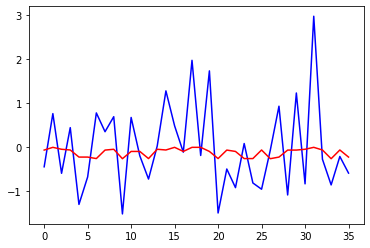

In [79]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ]
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

MSE: 
 14437118.055936355

R2: 
 0.05878976643909184

MAPE: 
 [0.22161719]


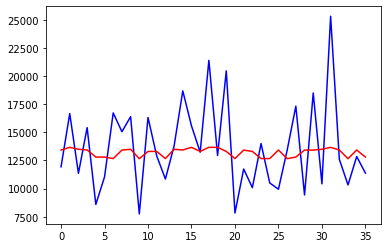

In [81]:
r2_scores = []
mse_scores = []
mape_scores = []
from sklearn import ensemble
best_gbr = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
best_gbr.fit(X_train, Y_train)
Y_pred = best_gbr.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[19:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=-13.348, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[19:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=-0.142, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[19:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=-0.423, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[19:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=-12.954, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[19:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=-0.072, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estima

[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=-0.101, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=20 ................
[19:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=-0.665, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[19:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=-13.986, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[19:08:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_e

[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=-0.673, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=50 .................
[19:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=-0.786, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[19:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=-16.574, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[19:08:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_esti

[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.129, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=100 ...............
[19:08:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=-0.393, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[19:08:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-14.995, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[19:08:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n

[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-0.673, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=10 ...............
[19:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-0.070, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[19:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-14.715, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[19:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15,

[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-0.773, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=20 ...............
[19:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-0.047, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[19:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-15.147, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[19:08:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7,

[19:08:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-0.794, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=50 ..............
[19:08:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-0.043, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[19:08:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-15.274, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[19:08:42] WARNING: C:/Jenkins/work

[19:08:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-15.274, total=   0.0s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[19:08:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-0.786, total=   0.0s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[19:08:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-0.044, total=   0.0s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   11.7s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[19:08:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  0.8657098904990999
R2 score = 0.13429010950090015

Mean Absolute Percentage Error = [-0.29246258]
Mean Absolute Error is: 0.7622375333229238


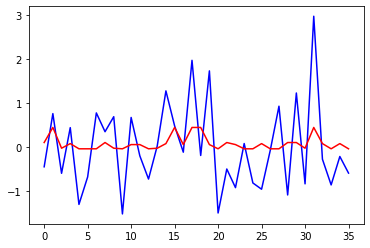

In [82]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

[19:09:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 
 13279027.557155607

R2: 
 0.13429005843773623

MAPE: 
 [0.23624029]


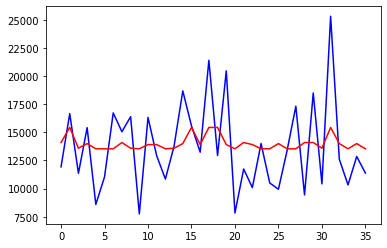

In [84]:
r2_scores = []
mse_scores = []
mape_scores = []
import xgboost as xgb
best_xgb = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
best_xgb.fit(X_train, Y_train)
Y_pred = best_xgb.predict(X_test)

Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test)
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores)